## Read data

In [2]:
#Read GPS data
import pandas as pd
data = pd.read_csv(r'data_sample/TaxiData-Sample',header = None)
data.columns = ['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']
data.head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [4]:
#Read OD data
TaxiOD = pd.read_csv(r'data_sample/taxi_OD.csv')
TaxiOD.columns = ['VehicleNum', 'Stime', 'SLng', 'SLat', 
       'ELng', 'ELat','Etime']
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22334,00:07:44,114.080498,22.554182,114.084915,22.540850,00:17:58
1,22334,00:18:56,114.084915,22.540850,114.056236,22.633383,00:44:47
2,22334,02:38:35,114.091637,22.543200,114.093498,22.554382,02:46:52
3,22334,03:58:46,114.038818,22.553232,114.052299,22.604366,04:13:57
4,22334,06:30:11,114.031250,22.519550,114.067886,22.521299,06:41:19


In [6]:
#time it
import time
timeflag = time.time()
#Method 1：Take the time as a string, 
#and use the str methodto take the first two characters
data['Hour'] = data['Stime'].str.slice(0,2)

#print time consumed
print('method 1',time.time()-timeflag,'s')
timeflag = time.time()

#Method 2：Take the time as a string, 
#and use apply method to get the first two characters in every row 
data['Hour'] = data['Stime'].apply(lambda r:r[:2])

#print time consumed
print('method 2',time.time()-timeflag,'s')
timeflag = time.time()

#Method 3: convert to time format and extract hours (very slow)
data['Hour'] = pd.to_datetime(data['Stime']).apply(lambda r:r.hour)

#print time consumed
print('method 3',time.time()-timeflag,'s')
timeflag = time.time()

method 1 1.0527639389038086 s
method 2 0.9918491840362549 s


/var/folders/lq/9vy4g6b12qq8qbkpm8pf5mf80000gn/T/ipykernel_1299/2012244142.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Hour'] = pd.to_datetime(data['Stime']).apply(lambda r:r.hour)


method 3 114.89913606643677 s


In [8]:
data['Hour']

0          22
1          18
2          18
3          16
4          21
           ..
1601302    20
1601303    20
1601304    20
1601305    20
1601306    20
Name: Hour, Length: 1601307, dtype: int64

In [10]:
#If we don't specify a column, it will count every column, 
#so here I only take one column to aggregate. For example['VehicleNum']

hourcount = data.groupby(data['Stime'].apply(lambda r:r[:2]))['VehicleNum'].count().reset_index()

In [11]:
hourcount.head(5)

,Stime,VehicleNum
0,00,68745
1,01,63142
2,02,60680
3,03,57494
4,04,57060


### Plot

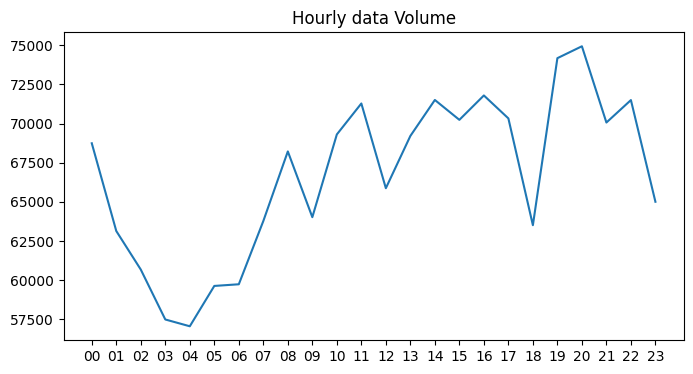

In [13]:
#In general, the code of plotting with Matplotlib consists of three parts
#Part I: creating a figure
import matplotlib.pyplot as plt
#use plt.figure to create a figure
#Where fig is the whole figure, 
#ax is one of the small sub figures in the figure 
#and plt is our pen
fig     = plt.figure(1,(8,4))    
ax      = plt.subplot(111)
#told the pen that we are going to plot on ax
plt.sca(ax)

#Part II: plot something
#use plt.plot to draw line plot
plt.plot(hourcount['Stime'],hourcount['VehicleNum'])


#Part III: Adjustment
plt.title('Hourly data Volume')
plt.show()

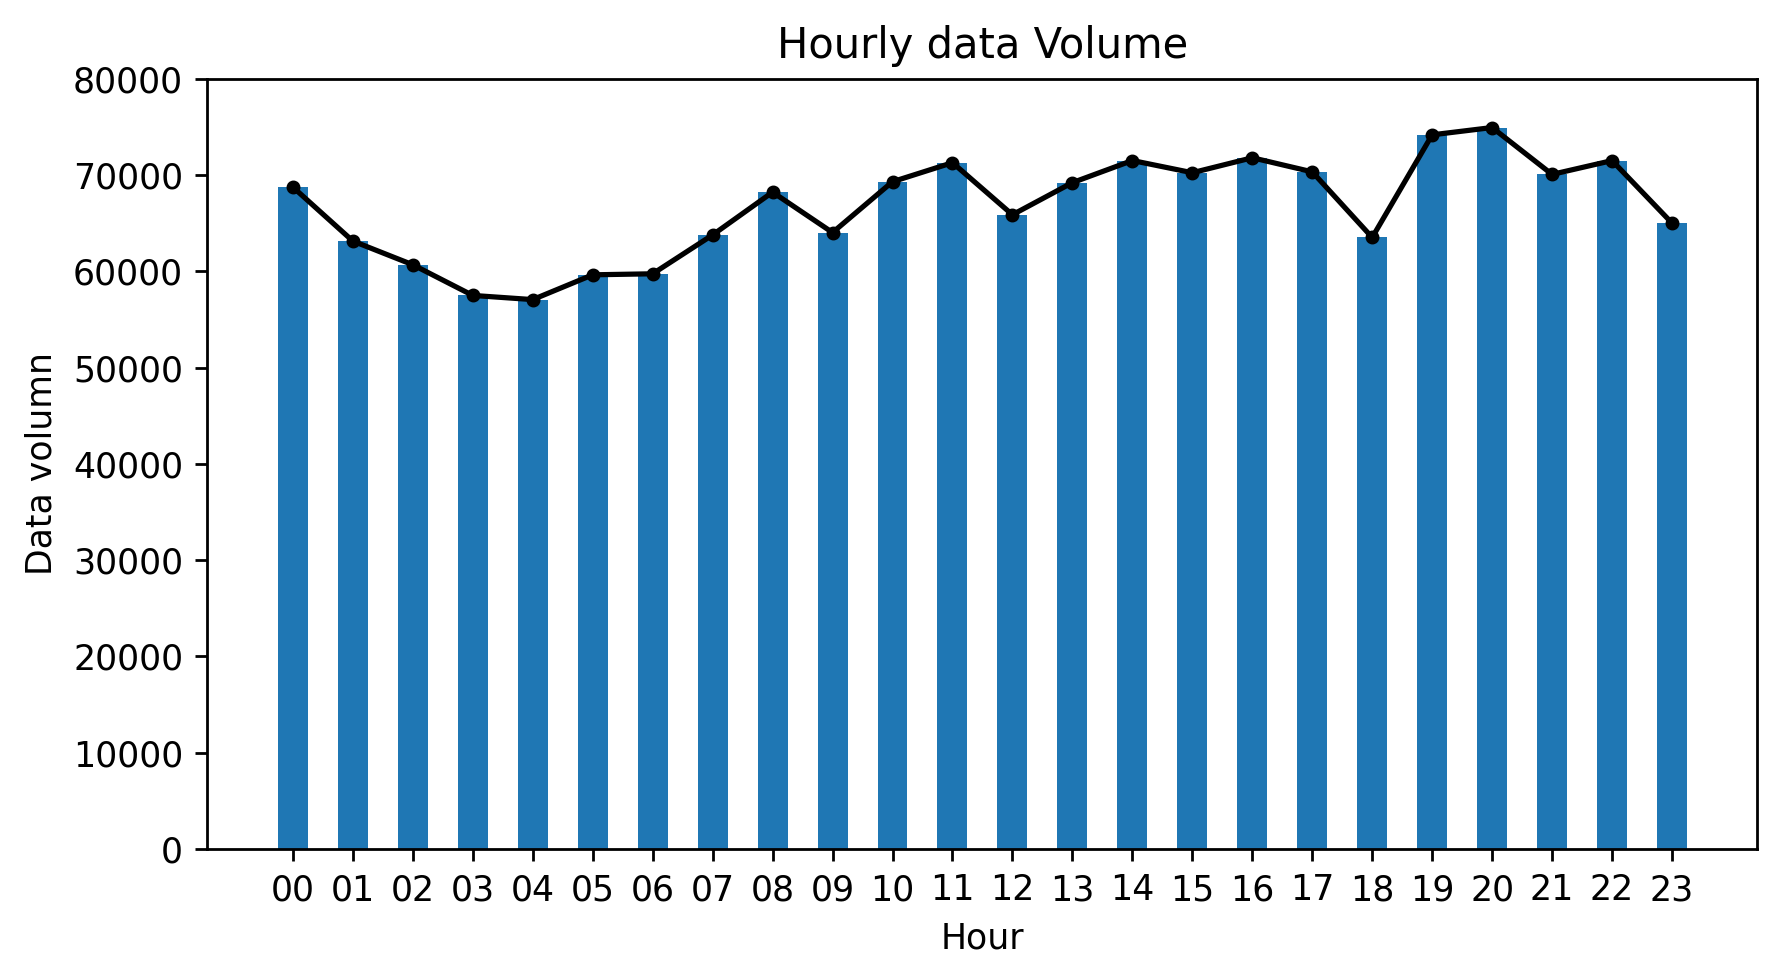

In [14]:
import matplotlib.pyplot as plt
fig     = plt.figure(1,(8,4),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#Change color of the line plot and add data points
plt.plot(hourcount['Stime'],hourcount['VehicleNum'],'k-',hourcount['Stime'],hourcount['VehicleNum'],'k.')
#Add bar plot
plt.bar(hourcount['Stime'],hourcount['VehicleNum'],width =0.5)

plt.title('Hourly data Volume')

#Fix the starting point of y-axis at 0
plt.ylim(0,80000)
plt.ylabel('Data volumn')
plt.xlabel('Hour')
plt.show()

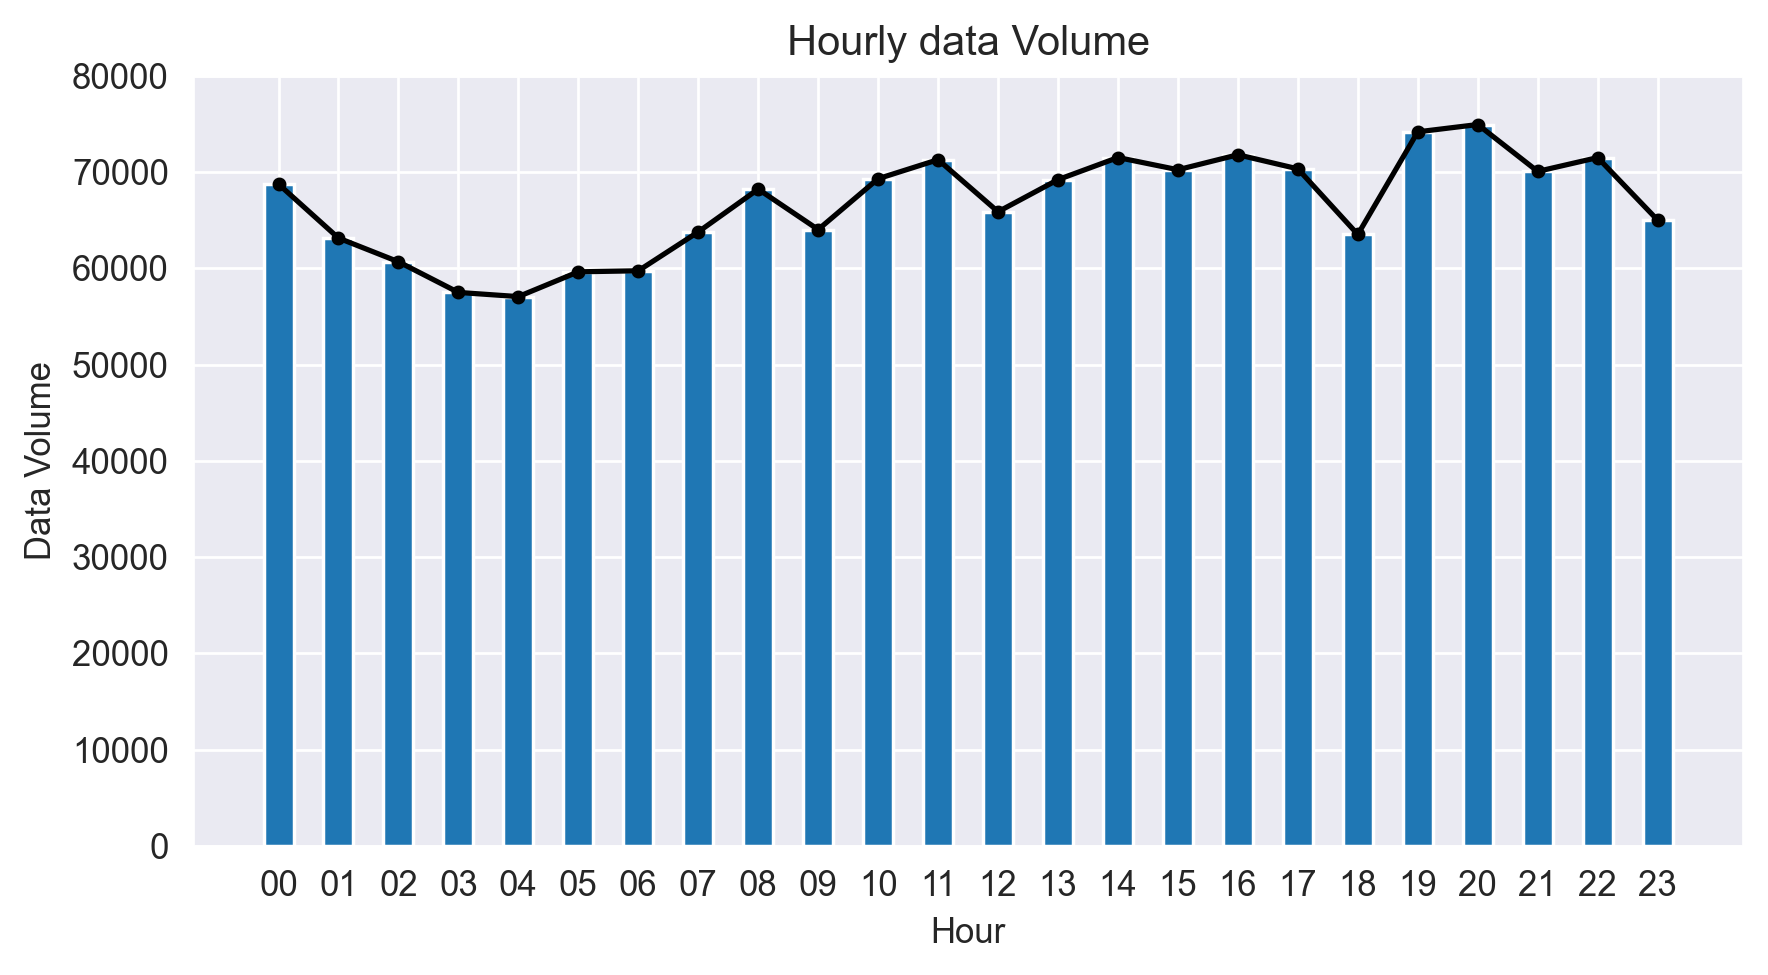

In [16]:
#Add the seaborn's theme
import seaborn as sns
sns.set_style('darkgrid',{"xtick.major.size": 10 , "ytick.major.size": 10})

import matplotlib.pyplot as plt
fig     = plt.figure(1,(8,4),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

plt.plot(hourcount['Stime'],hourcount['VehicleNum'],'k-',hourcount['Stime'],hourcount['VehicleNum'],'k.')
plt.bar(hourcount['Stime'],hourcount['VehicleNum'],width =0.5)

plt.title('Hourly data Volume')

plt.ylim(0,80000)
plt.ylabel('Data Volume')
plt.xlabel('Hour')
plt.show()

In [17]:
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22334,00:07:44,114.080498,22.554182,114.084915,22.540850,00:17:58
1,22334,00:18:56,114.084915,22.540850,114.056236,22.633383,00:44:47
2,22334,02:38:35,114.091637,22.543200,114.093498,22.554382,02:46:52
3,22334,03:58:46,114.038818,22.553232,114.052299,22.604366,04:13:57
4,22334,06:30:11,114.031250,22.519550,114.067886,22.521299,06:41:19


## Box chart of order duration

### Calculation of order duration

In [18]:
TaxiOD = TaxiOD[-TaxiOD['Etime'].isnull()]

In [20]:
import time
timeflag = time.time()
#Method 1：calculate by regarding it as a string
TaxiOD['order_time'] = TaxiOD['Etime'].str.slice(0,2).astype('int')*3600+\
TaxiOD['Etime'].str.slice(3,5).astype('int')*60+\
TaxiOD['Etime'].str.slice(6,8).astype('int')-\
TaxiOD['Stime'].str.slice(0,2).astype('int')*3600-\
TaxiOD['Stime'].str.slice(3,5).astype('int')*60-\
TaxiOD['Stime'].str.slice(6,8).astype('int')

#print time consumed
print('Method 1',time.time()-timeflag,'s')
timeflag = time.time()

#Method 2：convert to time format and extract duration (very slow)
TaxiOD['order_time'] = (pd.to_datetime(TaxiOD['Etime'])-pd.to_datetime(TaxiOD['Stime']))
TaxiOD['order_time'] = TaxiOD['order_time'].apply(lambda r:r.seconds)

#print time consumed
print('Method 2',time.time()-timeflag,'s')
timeflag = time.time()

Method 1 0.06922125816345215 s


/var/folders/lq/9vy4g6b12qq8qbkpm8pf5mf80000gn/T/ipykernel_1299/3624823349.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  TaxiOD['order_time'] = (pd.to_datetime(TaxiOD['Etime'])-pd.to_datetime(TaxiOD['Stime']))
/var/folders/lq/9vy4g6b12qq8qbkpm8pf5mf80000gn/T/ipykernel_1299/3624823349.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  TaxiOD['order_time'] = (pd.to_datetime(TaxiOD['Etime'])-pd.to_datetime(TaxiOD['Stime']))


Method 2 2.1621718406677246 s


In [21]:
TaxiOD['order_time'].head(5)

0     614
1    1551
2     497
3     911
4     668
Name: order_time, dtype: int64

### Plotting in two ways

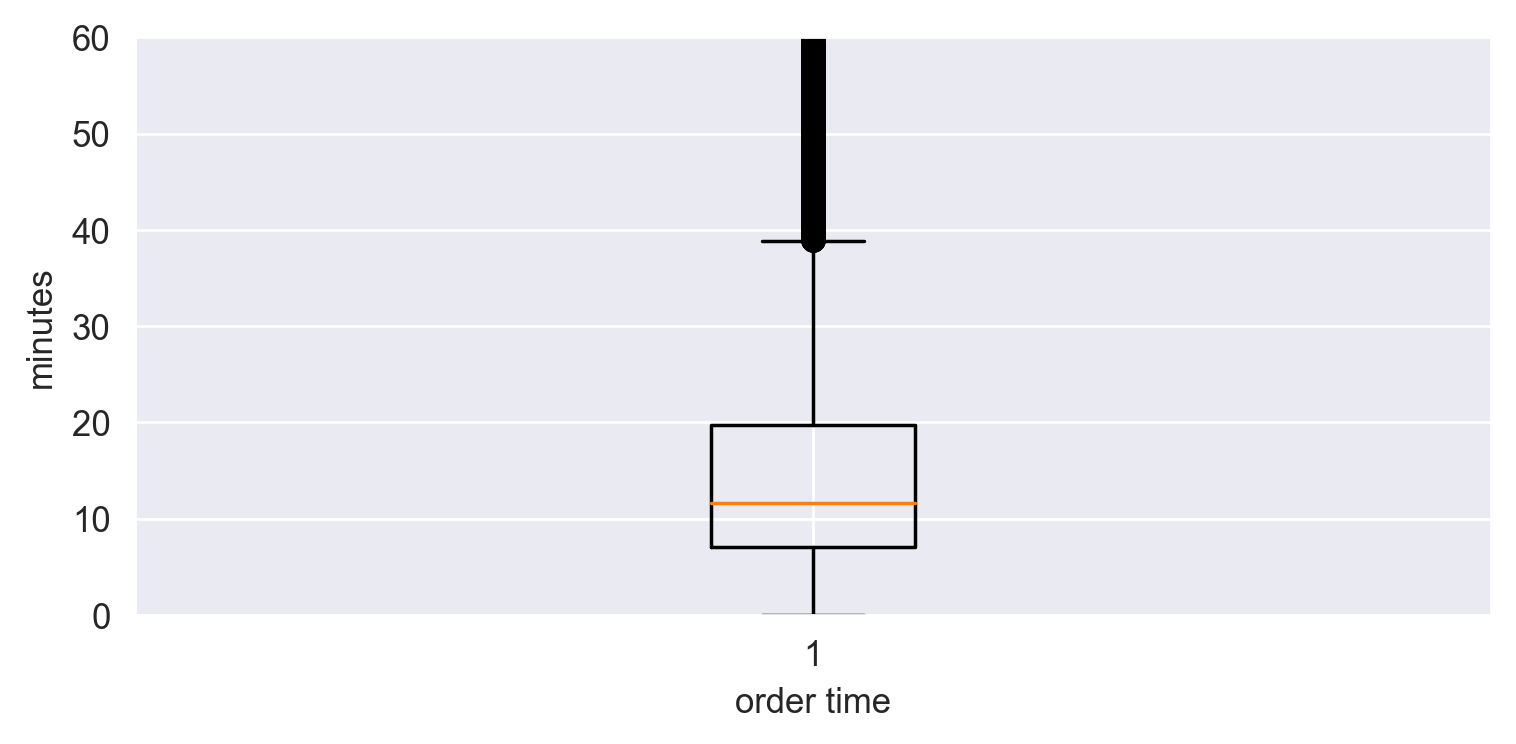

In [22]:
#plt.boxplot
fig     = plt.figure(1,(7,3),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

plt.boxplot(TaxiOD['order_time']/60)

plt.ylabel('minutes')
plt.xlabel('order time')
plt.ylim(0,60)
plt.show()

In [23]:
TaxiOD['Hour'] = TaxiOD['Stime'].str.slice(0,2)

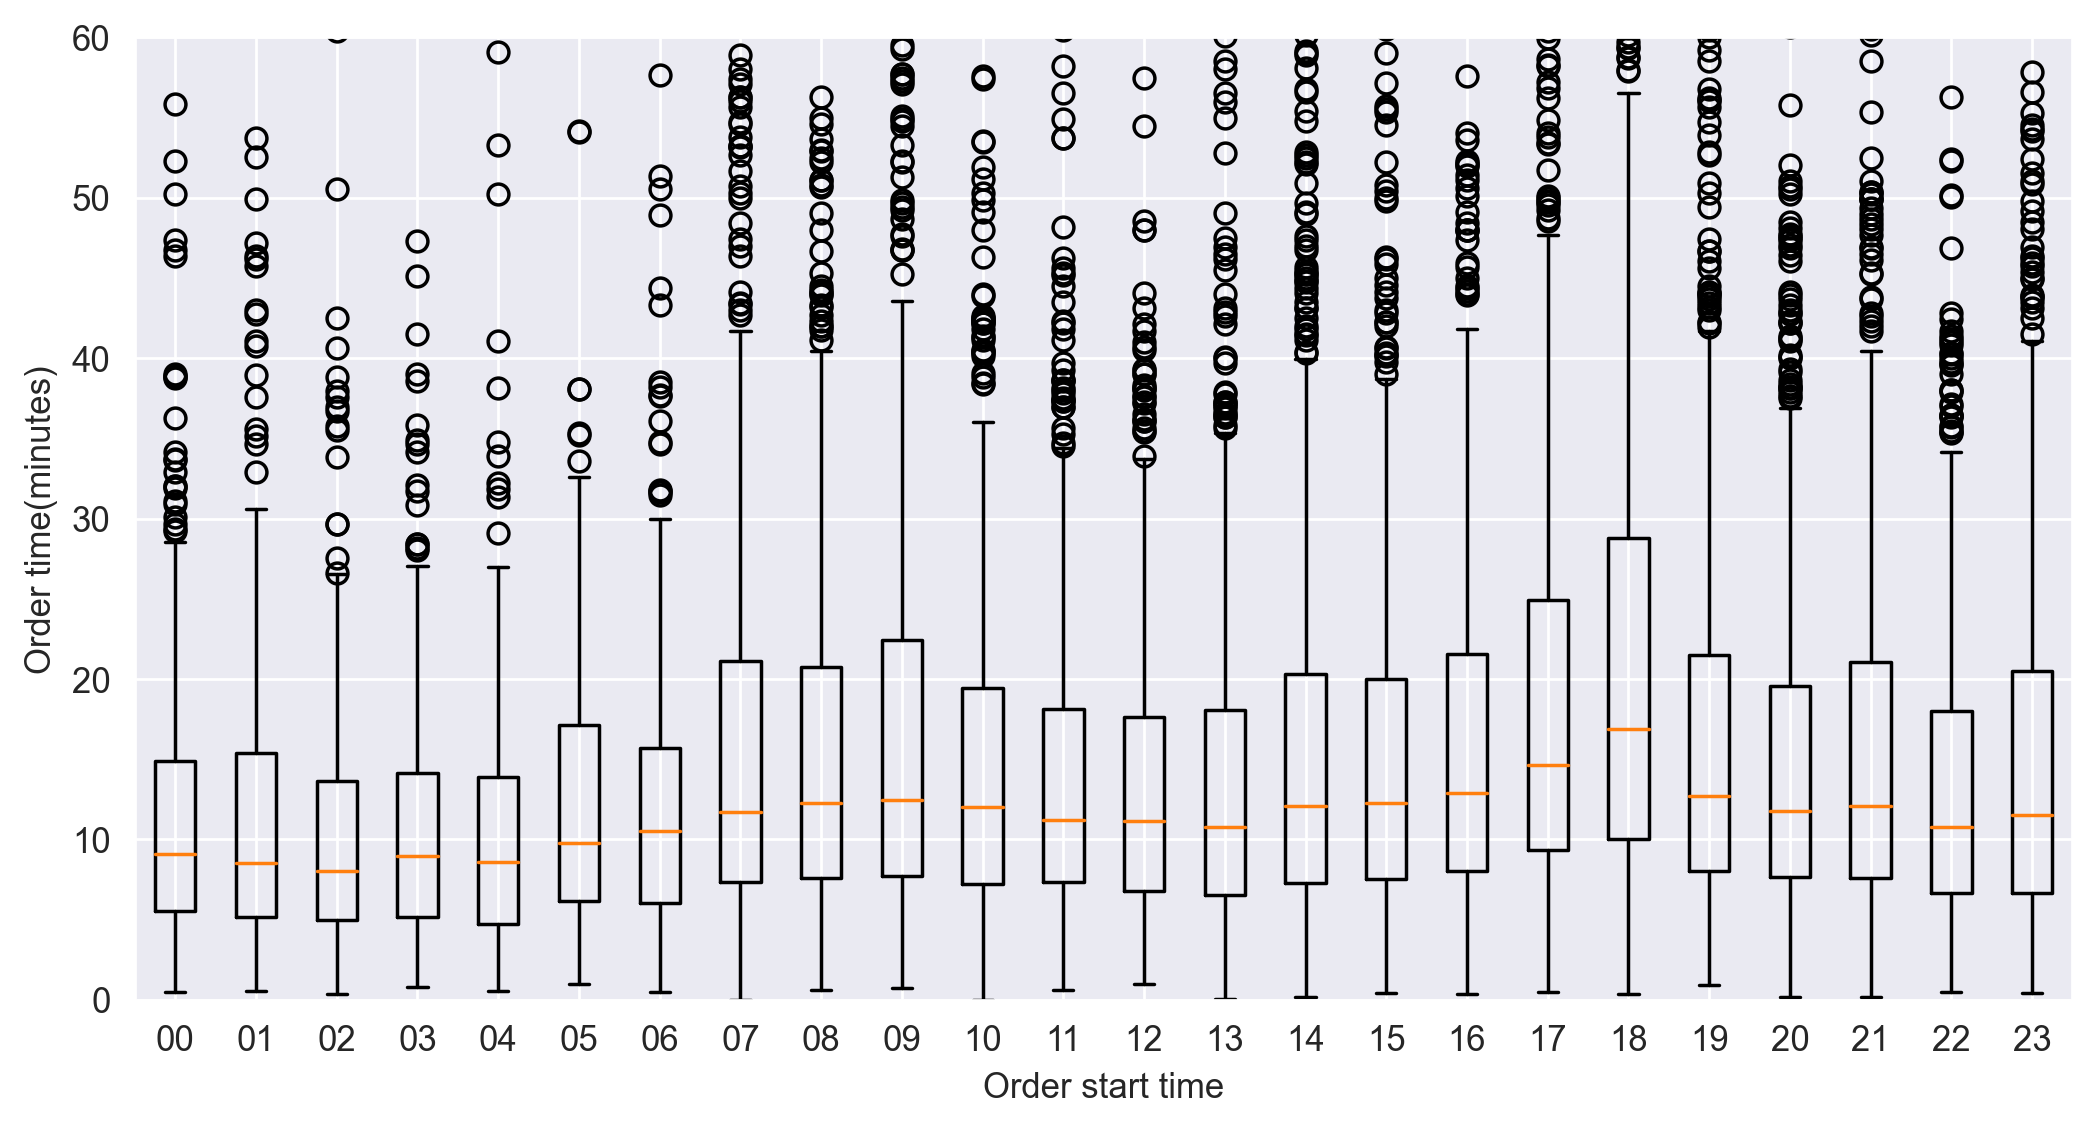

In [24]:
fig     = plt.figure(1,(10,5),dpi = 250)     
ax      = plt.subplot(111)
plt.sca(ax)

#Calculate data and transform format
hour = TaxiOD['Hour'].drop_duplicates().sort_values()
datas = []
for i in range(len(hour)):
    datas.append(TaxiOD[TaxiOD['Hour']==hour.iloc[i]]['order_time']/60)
#plot
plt.boxplot(datas)
#Change the ticks in x-axis
plt.xticks(range(1,len(hour)+1),list(hour))

plt.ylabel('Order time(minutes)')
plt.xlabel('Order start time')
plt.ylim(0,60)


plt.show()

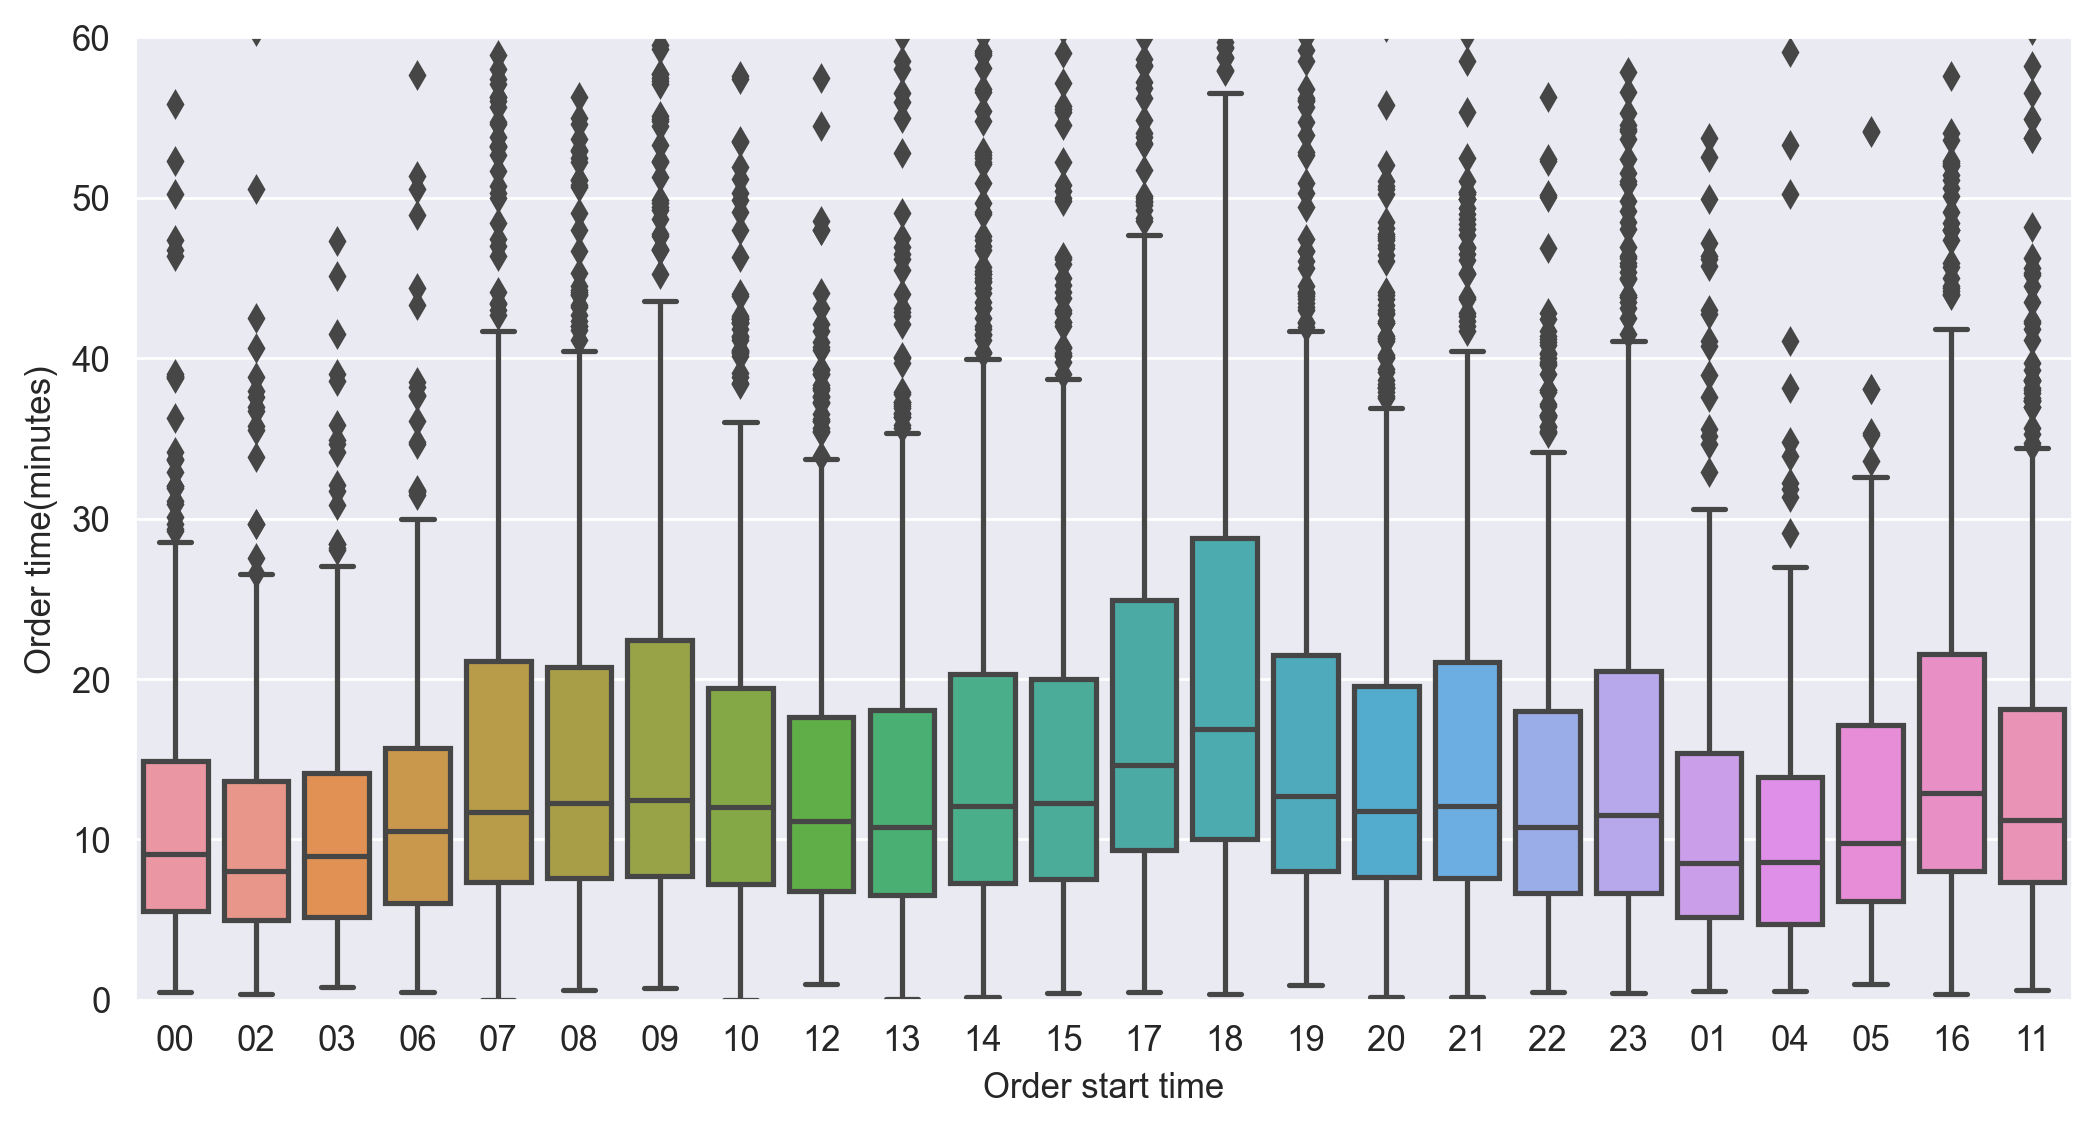

In [25]:
fig     = plt.figure(1,(10,5),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#Only one row:
sns.boxplot(x="Hour", y=TaxiOD["order_time"]/60, data=TaxiOD,ax = ax)

plt.ylabel('Order time(minutes)')
plt.xlabel('Order start time')
plt.ylim(0,60)
plt.show()